In [5]:
# Installing required libraries
!pip install pymysql

In [6]:
# Establishing a connection for MySQL
import pymysql
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection 
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Blinktrng@1', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM cars.car_price_dataset" 
    df = pd.read_sql(query, conn)

    # Display the results 
    print('Connection successful. Here is your data :')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

MySQL Error : (2003, "Can't connect to MySQL server on '127.0.0.1' ([WinError 10061] No connection could be made because the target machine actively refused it)")


In [13]:
df = pd.read_csv('C:\\Users\Aarti Suranje\Desktop\My doc\AI\car_csv.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [50]:
df.Fuel_Type.unique

<bound method Series.unique of 0       0
1       2
2       0
3       1
4       2
       ..
9995    0
9996    1
9997    3
9998    2
9999    0
Name: Fuel_Type, Length: 10000, dtype: int32>

In [51]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

In [14]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.duplicated().sum()

0

In [7]:
df.isnull().any().sum()

0

In [8]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [17]:
df['Owner_Count'] = pd.to_numeric(df['Owner_Count'], downcast='integer')
df['Year'] = pd.to_numeric(df['Year'], downcast='integer')
df['Doors'] = pd.to_numeric(df['Doors'], downcast='integer')
#df['Brand'] = pd.to_numeric(df['Brand'], downcast='integer')
#df['Model'] = pd.to_numeric(df['Model'], downcast='integer')
df['Price'] = pd.to_numeric(df['Price'], downcast='integer')
df['Mileage'] = pd.to_numeric(df['Mileage'], downcast='integer')
#df['Fuel_Type'] = pd.to_numeric(df['Fuel_Type'], downcast='integer')
df['Engine_Size'] = pd.to_numeric(df['Engine_Size'], downcast='float')


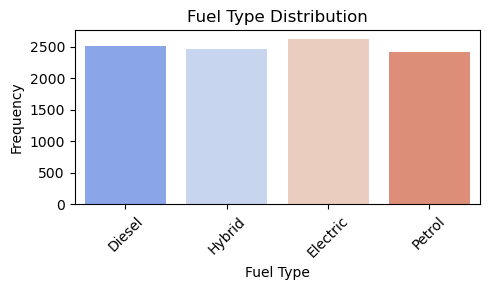

In [18]:
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = 'Fuel_Type', palette = 'coolwarm')
plt.title("Fuel Type Distribution")
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
'''
almost same distribution for all fuel type
'''

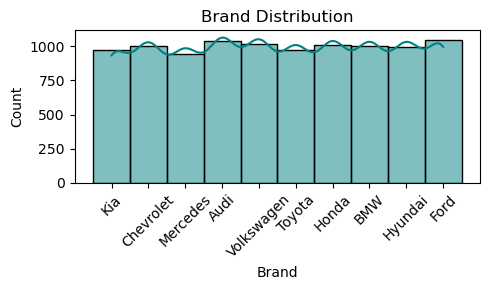

In [11]:
# Plot the distribution of Brand
plt.figure(figsize = (5, 3))
sns.histplot(df['Brand'], bins = 20, kde = True, color = 'teal')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
'''
almost brand distribution for all fuel type
'''

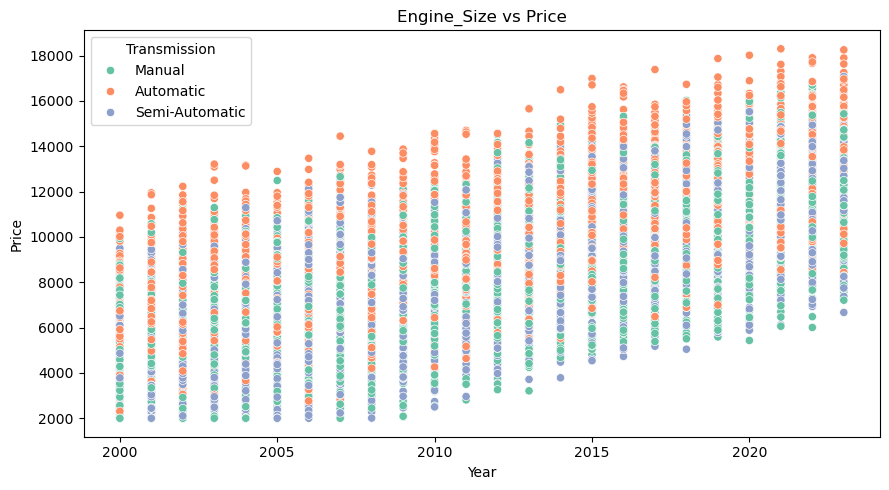

In [18]:
# Engine_Size vs Price
plt.figure(figsize = (9, 5))
sns.scatterplot(data = df, x = 'Year', y = 'Price', hue = 'Transmission', palette = 'Set2')
plt.title('Engine_Size vs Price')
plt.tight_layout()
plt.show()

In [ ]:
'''
from year 2010 price is increases
automactic carsa having highest price in throughout years
Manual cars is having low price range
'''

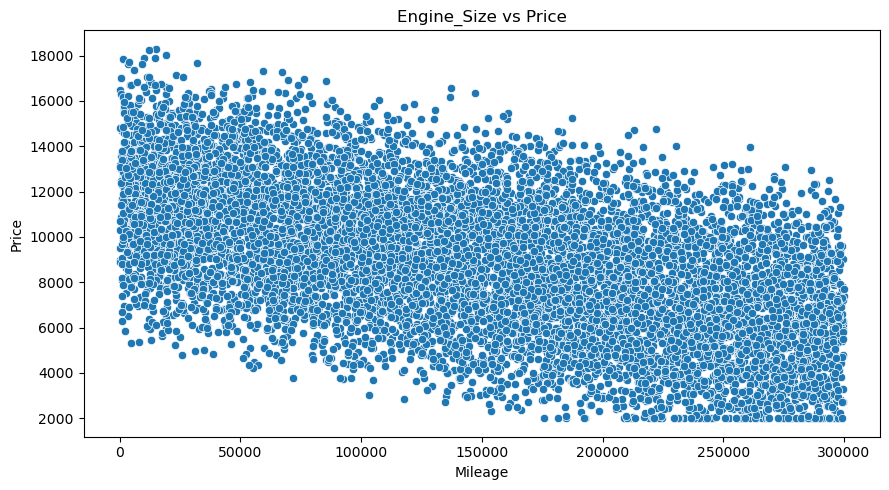

In [23]:
# Mileage vs Price
plt.figure(figsize = (9, 5))
sns.scatterplot(data = df, x = 'Mileage', y = 'Price', palette = 'Set2')
plt.title('MIleage vs Price')
plt.tight_layout()
plt.show()

In [ ]:
As Mileage increases, the Price decreases.

This means: Higher mileage cars are cheaper

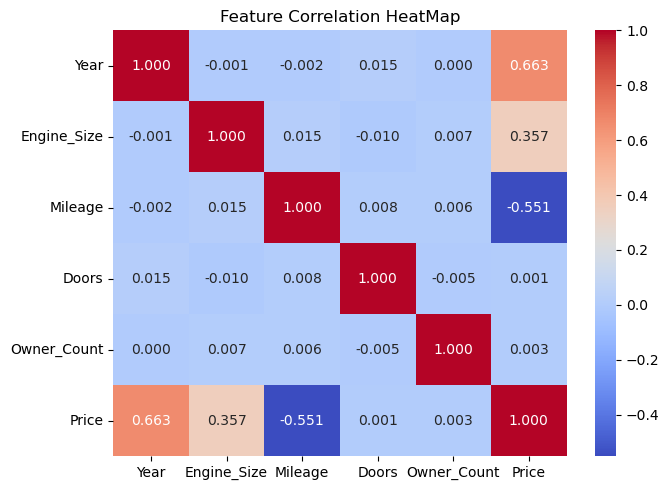

In [21]:
# Correlation Heatmap
plt.figure(figsize = (7, 5))
corr = df.select_dtypes(include = ['number']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.3f')
plt.title('Feature Correlation HeatMap')
plt.tight_layout()
plt.show()

In [ ]:
Feature Pair	Correlation Value	Meaning
Year vs Price	+0.663	Strong positive correlation → Newer cars (higher year) are priced higher. ✅
Engine_Size vs Price	+0.357	Moderate positive correlation → Bigger engine size slightly increases price.
Mileage vs Price	-0.551	Strong negative correlation → Higher mileage = lower price. ✅

In [23]:
import gc
gc.collect()

5458

In [24]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [21]:
# Getting input and output data
X = df.drop('Price', axis = 1)
y = df['Price']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40)

In [25]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=-1):  # Use all cores
    clf = RandomForestClassifier(n_jobs=-1)
    clf.fit(X_train, y_train)

MemoryError: could not allocate 93634560 bytes

In [22]:
# Creating the RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=100, warm_start=True)

# Fitting the data
clf.fit(X_train, y_train)

MemoryError: could not allocate 749076480 bytes

In [11]:
# Taking the predictions from the model
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

IndexError: list index out of range

In [98]:
#ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [10]:
# Model Evaluation
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred,average = 'weighted'), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred,average = 'weighted'), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred,average = 'weighted'), 3))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred,average = 'weighted'), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred,average = 'weighted'), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred,average = 'weighted'), 3))

NameError: name 'y_train_pred' is not defined

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame and the target variable is 'Price'
X1 = df.drop('Price', axis = 1)
y1 = df['Price']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X1_train, y1_train)

# Make predictions
y1_pred = model.predict(X1_test)

# Evaluate model performance
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 218650.79685400004


In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [26]:
# Taking the predictions from the model
y1_train_pred = model.predict(X1_train)
y1_test_pred = model.predict(X1_test)

In [27]:
print('Training Accuracy :', y1_train_pred)
print('Training Accuracy :', y1_test_pred)

Training Accuracy : [9831.8  9164.   8696.58 ... 9511.79 8100.64 8935.3 ]
Training Accuracy : [ 2443.9  11349.88 13502.69 ...  9129.3   6579.33 11664.68]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values
mse = mean_squared_error(y1_test, y1_test_pred)
r2 = r2_score(y1_test, y1_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 218650.79685400004
R-squared: 0.9762020815778367


In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test and y_pred are your actual and predicted values
#accuracy = accuracy_score(y1_test, y1_test_pred)
report = classification_report(y1_test, y1_test_pred)

#print(f'Accuracy: {accuracy}')
#print(f'Classification Report:\n{report}')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [33]:
print('Training Accuracy :', np.round(metrics.accuracy_score(y1_train, y1_train_pred), 3))
#print('Training Precision :', np.round(metrics.precision_score(y1_train, y1_train_pred,average = 'weighted'), 2))
#print('Training Recall :', np.round(metrics.recall_score(y1_train, y1_train_pred,average = 'weighted'), 2))
#print('Training F1 Score :', np.round(metrics.f1_score(y1_train, y1_train_pred,average = 'weighted'), 2))

#print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y1_test, y1_test_pred),2))
#print('Testing Precision :', np.round(metrics.precision_score(y1_test, y1_test_pred,average = 'weighted'),2))
#print('Testing Recall :', np.round(metrics.recall_score(y1_test, y1_test_pred,average = 'weighted'), 2))
#print('Testing F1 Score :', np.round(metrics.f1_score(y1_test, y1_test_pred,average = 'weighted'), 2))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [40]:
# Installing xgboost
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 9.6 MB/s eta 0:00:16
   - -------------------------------------- 4.5/150.0 MB 20.7 MB/s eta 0:00:08
   - -------------------------------------- 4.5/150.0 MB 20.7 MB/s eta 0:00:08
   - -------------------------------------- 6.0/150.0 MB 7.4 MB/s eta 0:00:20
   - -------------------------------------- 7.1/150.0 MB 7.2 MB/s eta 0:00:20
   -- ------------------------------------- 7.9/150.0 MB 6.4 MB/s eta 0:00:23
   -- ------------------------------------- 8.7/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 9.4/150.0 MB 5.6 MB/s eta 0:00:26
   -- ------------------------------------- 10.0/150.0 MB 5.4 MB/s eta 0:00:26
   -- ------------------------------------- 10.7/150.0 MB 5.2 MB/s eta 0:00:27
   --- ------------------------------------ 11.5/150.0 MB 5.0 MB/s eta 0:00:28
   --- ------------------------------------ 12.3/150.0 MB 4.9 MB/s

In [32]:
# Assuming 'df' is your DataFrame and the target variable is 'Price'
X1 = df.drop('Price', axis = 1)
y1 = df['Price']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [45]:
print(X1)

      Brand  Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  \
0         6     24  2020          4.2          0             1   289944   
1         2     19  2012          2.0          2             0     5356   
2         7     16  2020          4.2          0             0   231440   
3         0     22  2023          2.0          1             1   160971   
4         9     17  2003          2.6          2             2   286618   
...     ...    ...   ...          ...        ...           ...      ...   
9995      6     20  2004          3.7          0             2     5794   
9996      2     18  2002          1.4          1             0   168000   
9997      1      0  2010          3.0          3             0    86664   
9998      3     13  2002          1.4          2             0   225772   
9999      9     27  2001          2.1          0             1   157882   

      Doors  Owner_Count  
0         3            5  
1         2            3  
2         4       

In [33]:
# Creating the XGBoost()
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 5)

# Fitting the data
xgb.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
# Taking the predictions from the model
y1_train_pred = xgb.predict(X1_train)
y1_test_pred = xgb.predict(X1_test)

In [35]:
print('Training Accuracy :', y1_train_pred)
print('Testing Accuracy :', y1_test_pred)

Training Accuracy : [9670.527 9270.55  8431.24  ... 9341.351 7904.178 9012.431]
Testing Accuracy : [ 1870.4404 11017.733  13938.231  ...  8308.818   6796.1494 11920.914 ]


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values
mse = mean_squared_error(y1_test, y1_test_pred)
r2 = r2_score(y1_test, y1_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 59902.02734375
R-squared: 0.9934802651405334


In [44]:
# Save the model to a file using pickle
with open('xgb_regressor_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

print("Model saved successfully!")

Model saved successfully!
